Todos: Have to add ranking to both prob files
Also add weights to datapoints - https://www.kaggle.com/general/22130
https://xgboost.readthedocs.io/en/latest/python/python_api.html


ref - http://localhost:4321/notebooks/azure-backup-notebooks/GTF_Manuscript/MS_N5.ipynb

ref - http://localhost:4321/notebooks/azure-backup-notebooks/GTF_Manuscript/MS_N6.ipynb

In [1]:
import pandas as pd
import csv
import numpy as np
import scipy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import random
from inspect import signature

from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
sns.set_palette("husl")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import requests
import itertools
import networkx as nx
import datetime
import io
import random
import warnings
import json
import requests
import time

In [2]:
gene_lookup_dict_ensg2name = pickle.load( 
    open( "./data_generated/ens2gname_lookup.p", "rb" ) )

gt_param_df = pd.read_csv('./data_generated/gt_param_df_wlabel.csv')
gt_param_df.head()


,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Clustering_coeff,...,NumOfTFNeighbors,Centrality_coeff,NeighborMeanBreadth,NeighborMeanZscore,NeighborMedianBreadth,NeighborMedianZscore,Description,Level_enc,Pos,Label
0,ENSG00000187634,Stomach,4.720096,4.267317,-0.036851,3.423000,0.763231,0.904074,2.489289,0.047619,...,2,1.209951e-06,0.296060,-0.366241,0.261838,-0.380078,SAMD11,-1.00,0.0,U
1,ENSG00000188976,Stomach,44.847466,15.854806,-0.412520,42.380001,0.220056,0.353527,14.366420,0.253545,...,15,9.446877e-05,0.349456,-0.245143,0.309192,-0.260509,NOC2L,0.00,0.0,N
2,ENSG00000187961,Stomach,11.037735,4.394696,-0.145059,10.360000,0.445682,0.398152,3.558246,0.333333,...,0,2.254576e-07,0.300836,-0.350367,0.274373,-0.335166,KLHL17,0.75,0.0,U
3,ENSG00000187583,Stomach,1.643722,1.750657,-0.314139,1.138000,0.682451,1.065057,1.040194,0.000000,...,1,5.063642e-07,0.470752,0.818392,0.284123,-0.294220,PLEKHN1,-1.00,0.0,U
4,ENSG00000187642,Stomach,0.612194,0.432204,-0.298348,0.489900,0.454039,0.705991,0.274874,0.000000,...,0,0.000000e+00,0.311978,-0.253442,0.311978,-0.253442,PERM1,0.00,0.0,N


In [3]:
gt_param_df.shape

(453455, 25)

In [4]:
len(set(gt_param_df['Tissue'].tolist()))

30

In [5]:
x = gt_param_df[gt_param_df['Pos'] ==1]
x['Tissue'].value_counts()

Brain              1809
Muscle             1165
Skin                829
Blood               646
Lung                631
Heart               615
Liver               472
Testis              280
Spleen              214
Esophagus           204
Blood Vessel        160
Stomach             139
Breast              132
Thyroid             108
Colon               103
Pancreas             80
Uterus               76
Adrenal Gland        71
Pituitary            65
Nerve                65
Small Intestine      65
Adipose Tissue       62
Ovary                62
Vagina               41
Prostate             18
Name: Tissue, dtype: int64

In [6]:
gt_param_df['Tissue'].value_counts()

Testis             15619
Kidney             15505
Brain              15500
Pituitary          15439
Salivary Gland     15420
Pancreas           15370
Breast             15334
Prostate           15298
Spleen             15254
Thyroid            15251
Vagina             15250
Heart              15232
Small Intestine    15223
Adipose Tissue     15222
Adrenal Gland      15166
Ovary              15146
Lung               15146
Stomach            15136
Nerve              15102
Esophagus          15098
Colon              15084
Uterus             14996
Liver              14981
Cervix Uteri       14981
Skin               14959
Muscle             14924
Blood Vessel       14894
Blood              14884
Bladder            14515
Fallopian Tube     13526
Name: Tissue, dtype: int64

In [7]:
gt_param_df['Label'].value_counts()

U    380393
N     66250
P      6812
Name: Label, dtype: int64

In [62]:
train_df['Label'].drop_duplicates().tolist()

[0, 1]

In [65]:
table = train_df
feature = 'ZScore'
scipy.stats.mannwhitneyu(table[table['Label'] == 1][feature].tolist(), 
                               table[table['Label'] == 0][feature].tolist(),
                                  alternative='greater')

MannwhitneyuResult(statistic=236504122.5, pvalue=2.8870318872010282e-11)

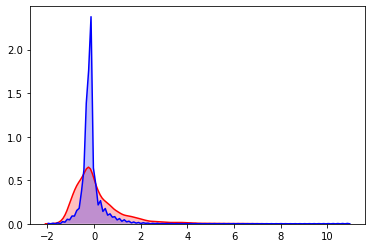

In [73]:
# sns.boxplot(x="Label", y="ZScore", data=train_df)
p1=sns.kdeplot(table[table['Label'] == 1][feature].tolist(), shade=True, color="r")
p1=sns.kdeplot(table[table['Label'] == 0][feature].tolist(), shade=True, color="b")


Random under-sampling:
1    6812
0    6812
Name: Label, dtype: int64


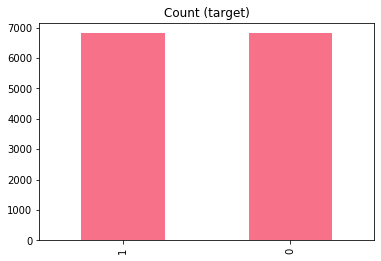

In [76]:
df_train = train_df
count_class_0, count_class_1 = df_train.Label.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Label'] == 0]
df_class_1 = df_train[df_train['Label'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Label.value_counts())

df_test_under.Label.value_counts().plot(kind='bar', title='Count (target)');

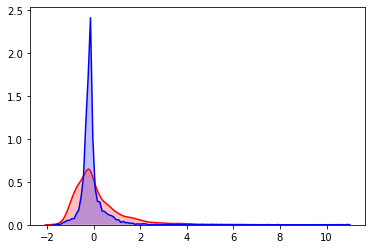

In [79]:
p1=sns.kdeplot(table[table['Label'] == 1][feature].tolist(), shade=True, color="r")
p1=sns.kdeplot(df_class_0_under[df_class_0_under['Label'] == 0][feature].tolist(), shade=True, color="b")

In [78]:
scipy.stats.mannwhitneyu(table[table['Label'] == 1][feature].tolist(), 
                               df_class_0_under[df_class_0_under['Label'] == 0][feature].tolist(),
                                  alternative='greater')

MannwhitneyuResult(statistic=24193740.0, pvalue=7.729598772254596e-06)

# XGB model for each of the features

In [27]:
gt_param_df[(gt_param_df['Gene']=='ENSG00000000457') & (gt_param_df['Tissue']=='Cervix Uteri') ]

,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Clustering_coeff,...,NumOfTFNeighbors,Centrality_coeff,NeighborMeanBreadth,NeighborMeanZscore,NeighborMedianBreadth,NeighborMedianZscore,Description,Level_enc,Pos,Label
38625,ENSG00000000457,Cervix Uteri,10.381526,1.661147,1.514916,10.45,1.0,0.16001,1.881422,0.238095,...,1,0.000006,0.766917,0.136424,0.789474,0.026308,SCYL3,0.0,0.0,N


In [57]:
train_df = gt_param_df[gt_param_df['Label'] != 'U']
train_df.head()

train_df = gt_param_df[gt_param_df['Label'] != 'U']
label_list = []

for index,row in train_df.iterrows():
    if row['Label'] == 'P':
        label_list.append(1)
    else:
        label_list.append(0)
        
train_df['Label'] = label_list

train_df['Tissue'] = train_df['Tissue'].str.replace(" ","")
train_df['G_T'] = train_df[['Gene', 'Tissue']].apply(lambda x: '_'.join(x), axis=1)

pos_sampled = pd.read_csv('./data_generated/P.sample',sep='\t',header=None)[0].tolist()
neg_sampled = pd.read_csv('./data_generated/N.sample',sep='\t',header=None)[0].tolist()
print(len(pos_sampled),len(neg_sampled))
train_df = train_df[(train_df['G_T'].isin(pos_sampled)) | (train_df['G_T'].isin(neg_sampled))]
print(train_df.shape)
print(train_df['Label'].drop_duplicates().tolist())
train_df.head()

/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


6812 27248
(34059, 26)
[0, 1]


/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Clustering_coeff,...,Centrality_coeff,NeighborMeanBreadth,NeighborMeanZscore,NeighborMedianBreadth,NeighborMedianZscore,Description,Level_enc,Pos,Label,G_T
1,ENSG00000188976,Stomach,44.847466,15.854806,-0.412520,42.380001,0.220056,0.353527,14.366420,0.253545,...,9.446877e-05,0.349456,-0.245143,0.309192,-0.260509,NOC2L,0.00,0.0,0,ENSG00000188976_Stomach
11,ENSG00000186827,Stomach,3.581417,2.671058,-0.198578,2.751000,0.635097,0.745810,1.810257,1.000000,...,0.000000e+00,0.538533,0.020960,0.693593,-0.161064,TNFRSF4,0.00,0.0,0,ENSG00000186827_Stomach
31,ENSG00000197530,Stomach,26.114805,10.997825,-0.501625,23.629999,0.220056,0.421134,9.622091,0.098814,...,2.479875e-05,0.252634,-0.416830,0.236769,-0.371313,MIB2,0.00,0.0,0,ENSG00000197530_Stomach
40,ENSG00000142609,Stomach,0.026728,0.027844,-0.282761,0.019550,0.155989,1.041755,0.019630,0.000000,...,3.356854e-07,0.474466,-0.143874,0.440111,-0.117387,CFAP74,0.00,0.0,0,ENSG00000142609_Stomach
44,ENSG00000157933,Stomach,35.633789,23.884581,-0.501055,24.180000,0.239554,0.670279,11.282604,0.121268,...,1.078451e-04,0.338603,-0.270250,0.306407,-0.289423,SKI,0.75,1.0,1,ENSG00000157933_Stomach


In [61]:
scipy.stats.mannwhitneyu(train_df[train_df['Label'] == 1]['ZScore'].tolist(), 
                               train_df[train_df['Label'] == 0]['ZScore'].tolist(),
                                  alternative='greater')

MannwhitneyuResult(statistic=92765761.0, pvalue=0.5206142952566696)

In [64]:
6812/(6812+27248)

0.2

In [58]:
# forsrid = train_df[['G_T','ZScore','Label']]
# forsrid.to_csv('./data_generated/fugue_gt_sampling.csv',index = False)
# forsrid.head()

In [13]:
features = ['MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff',
        'NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore']
feature_auprc = []
feature_auroc = []

for feature in features:
    X = train_df[[feature]]
    y = train_df['Label'].tolist()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    model = XGBClassifier(max_depth=3, n_estimators=100,
                          learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)

    y_prob_dict = {0:[],1:[]}

    for i in y_scores:
        y_prob_dict[0].append(i[0])
        y_prob_dict[1].append(i[1])

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_dict[1])
    au_roc = roc_auc_score(y_test, y_prob_dict[1])
    au_prc = metrics.auc(recalls, precisions)
    feature_auprc.append(au_prc)
    feature_auroc.append(au_roc)

/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [14]:
feature_auc_df = pd.DataFrame({'Feature':features, 'AUPRC' : feature_auprc,
                              'AUROC' : feature_auroc })
feature_auc_df

,Feature,AUPRC,AUROC
0,MeanExp,0.180351,0.706236
1,SDofExp,0.165297,0.693865
2,ZScore,0.241637,0.747413
3,MedianExp,0.189521,0.711693
4,Breadth,0.169046,0.627479
5,CV,0.141197,0.645997
6,MAD,0.174556,0.709047
7,Centrality_coeff,0.148854,0.648830
8,Clustering_coeff,0.148576,0.665954
9,NumOfKinaseNbs,0.159388,0.604226


# XGB model with all parameters

In [62]:
train_df.columns

Index(['Gene', 'Tissue', 'MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Clustering_coeff', 'IsKinase', 'IsTF',
       'NeighborList', 'NumOfKinaseNbs', 'NumOfNeighbors', 'NumOfTFNeighbors',
       'Centrality_coeff', 'NeighborMeanBreadth', 'NeighborMeanZscore',
       'NeighborMedianBreadth', 'NeighborMedianZscore', 'Description',
       'Level_enc', 'Pos', 'Label', 'G_T'],
      dtype='object')

In [71]:
# train_df = train_df[['Gene','CV', 'Tissue', 'MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
#        'Breadth', 'MAD', 'Clustering_coeff', 'IsKinase', 'IsTF',
#        'NeighborList', 'NumOfKinaseNbs', 'NumOfNeighbors', 'NumOfTFNeighbors',
#        'Centrality_coeff', 'NeighborMeanBreadth', 'NeighborMeanZscore',
#        'NeighborMedianBreadth', 'NeighborMedianZscore', 'Description',
#        'Level_enc', 'Pos', 'Label']]

X = train_df.drop(['ZScore','NeighborMeanZscore','Gene', 'Tissue','IsKinase','IsTF','NeighborList','NeighborMedianBreadth','NeighborMedianZscore','Level_enc', 'Pos', 'Label','Description','G_T'],axis=1)

y = train_df['Label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape,X_test.shape )

model = XGBClassifier(max_depth=5, n_estimators=100,
                      learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)

y_prob_dict = {0:[],1:[]}

for i in y_scores:
    y_prob_dict[0].append(i[0])
    y_prob_dict[1].append(i[1])

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_dict[1])
auc_score = roc_auc_score(y_test, y_prob_dict[1])
print('AU-ROC: '+str(auc_score))
print('AU-PRC: '+str(metrics.auc(recalls, precisions)))

(27247, 12) (6812, 12)
AU-ROC: 0.7616923460307682
AU-PRC: 0.49545776042419304


# Get feature importance

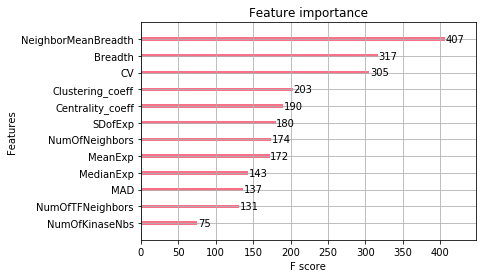

In [72]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [19]:
f_score = 0
prec = 0
rec = 0
for precision, recall in zip(precisions, recalls):
    f = (2*precision*recall)/(recall+precision)
    if f_score < f:
#         print(f)
        f_score = f
        prec = precision
        rec = recall
    else:
        continue
    
print(f_score)
print(prec)
print(rec)

0.4970578054690204
0.4748677248677249
0.5214233841684822


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.50')

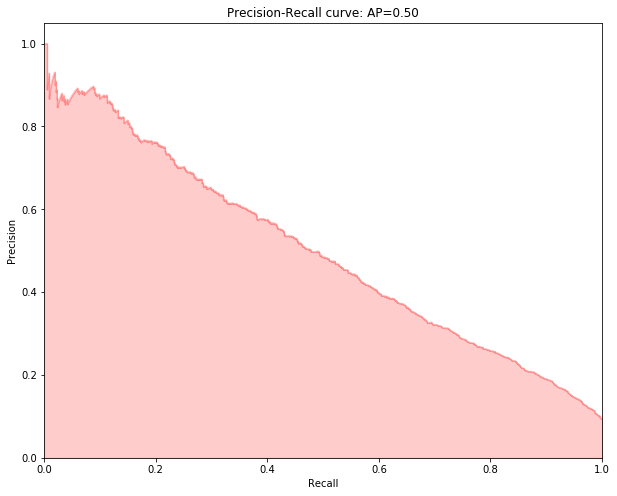

In [20]:
average_precision = average_precision_score(y_test, y_prob_dict[1]) 
precision, recall, _ = precision_recall_curve(y_test, y_prob_dict[1])
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(10,8))

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision)) 

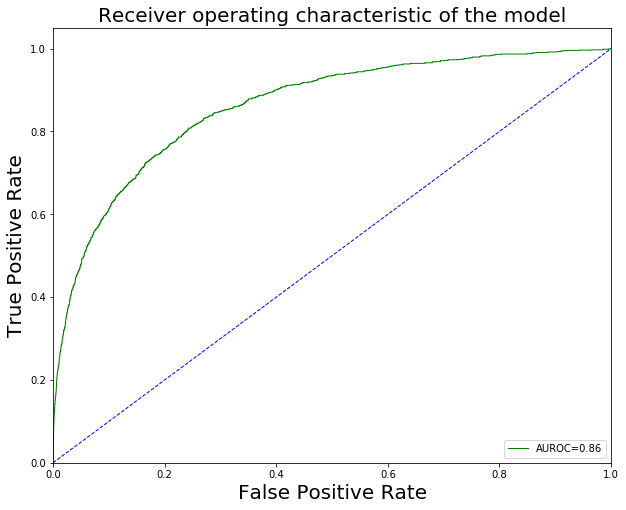

In [21]:


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_dict[1], pos_label=1)

plt.figure(figsize=(10,8))
lw = 1
plt.plot(fpr, tpr, color='green',
         lw=lw,label='AUROC={0:0.2f}'.format(
          auc_score))
plt.plot([0, 1], [0, 1], color='b', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic of the model',fontsize=20)
plt.legend(loc="lower right")
plt.show()


/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0
10
20
30
40
50
60
70
80
90
0.5022101825170872
0.013153848867421875


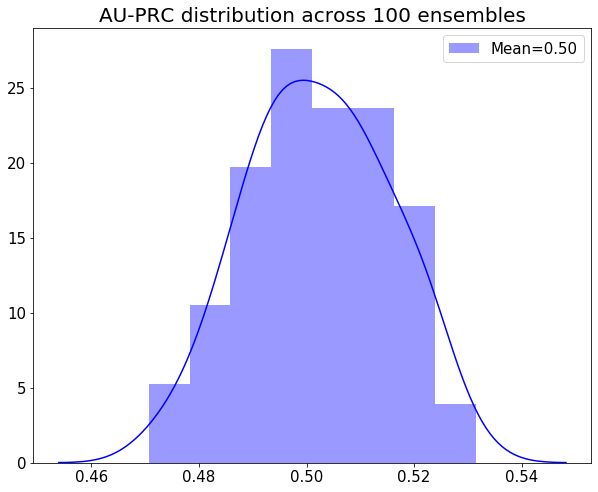

In [24]:
train_df = gt_param_df[gt_param_df['Label'] != 'U']
label_list = []

for index,row in train_df.iterrows():
    if row['Label'] == 'P':
        label_list.append(1)
    else:
        label_list.append(0)
        

train_df['Label'] = label_list

X = train_df.drop(['Gene', 'Tissue','Level_enc', 'Pos', 'Label','Description','NeighborList','IsKinase','IsTF'],axis=1)
y = train_df['Label'].tolist()

auprc_scores = []

for count in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    model = XGBClassifier(max_depth=5, n_estimators=100,
                          learning_rate=0.2,scale_pos_weight=20,objective = 'binary:logistic')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)

    y_prob_dict = {0:[],1:[]}

    for i in y_scores:
        y_prob_dict[0].append(i[0])
        y_prob_dict[1].append(i[1])

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_dict[1])
    auprc = metrics.auc(recalls, precisions)
    auprc_scores.append(auprc)
    
    if count%10 ==0:
        print(count)


print(np.mean(auprc_scores))
print(np.std(auprc_scores))
ax = plt.figure(figsize=(10,8))
ax = sns.distplot(auprc_scores, color="b",)
ax.legend(labels = ['Mean={0:0.2f}'.format(np.mean(auprc_scores))],fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title("AU-PRC distribution across 100 ensembles",fontsize=20)
plt.show()

/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0
10
20
30
40
50
60
70
80
90
0.8550921610154747
0.0052412650419371345


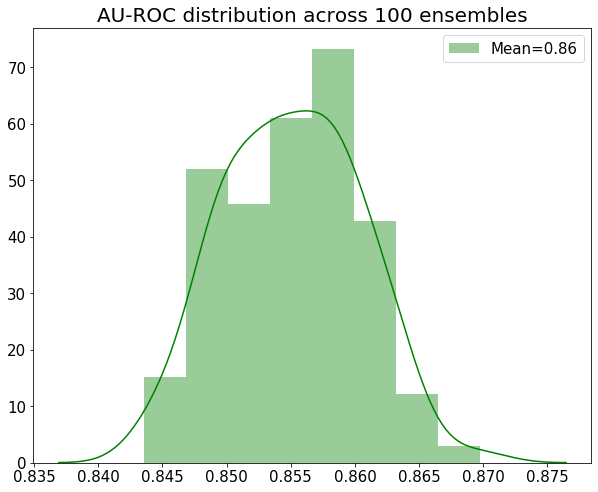

In [25]:
train_df = gt_param_df[gt_param_df['Label'] != 'U']
label_list = []

for index,row in train_df.iterrows():
    if row['Label'] == 'P':
        label_list.append(1)
    else:
        label_list.append(0)
        

train_df['Label'] = label_list


X = train_df.drop(['Gene', 'Tissue','Level_enc', 'Pos', 'Label','Description','NeighborList','IsKinase','IsTF'],axis=1)
y = train_df['Label'].tolist()

auroc_scores = []

for count in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    model = XGBClassifier(max_depth=5, n_estimators=100,
                          learning_rate=0.2,scale_pos_weight=20,objective = 'binary:logistic')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)

    y_prob_dict = {0:[],1:[]}

    for i in y_scores:
        y_prob_dict[0].append(i[0])
        y_prob_dict[1].append(i[1])

    auroc = roc_auc_score(y_test, y_prob_dict[1])

    auroc_scores.append(auroc)
    
    if count%10 ==0:
        print(count)

print(np.mean(auroc_scores))
print(np.std(auroc_scores))
ax = plt.figure(figsize=(10,8))
ax = sns.distplot(auroc_scores, color="g")
ax.legend(labels = ['Mean={0:0.2f}'.format(np.mean(auroc_scores))],fontsize = 15)
ax.tick_params(labelsize=15)

ax.set_title("AU-ROC distribution across 100 ensembles",fontsize=20)
plt.show()

In [28]:
X.head()

,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Clustering_coeff,IsKinase,IsTF,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,Centrality_coeff,NeighborMeanBreadth,NeighborMeanZscore,NeighborMedianBreadth,NeighborMedianZscore
1,44.847466,15.854806,-0.412520,42.380001,0.220056,0.353527,14.366420,0.253545,0,0,2,110,15,9.446877e-05,0.349456,-0.245143,0.309192,-0.260509
4,0.612194,0.432204,-0.298348,0.489900,0.454039,0.705991,0.274874,0.000000,0,0,0,1,0,0.000000e+00,0.311978,-0.253442,0.311978,-0.253442
6,28.283932,31.800543,-0.136983,17.270000,0.348189,1.124332,13.955735,0.057101,0,0,2,192,16,3.499879e-04,0.321480,-0.294317,0.286908,-0.290240
10,2.327132,2.278126,-0.289743,1.680000,0.584958,0.978941,1.653102,0.000000,0,0,0,4,0,6.311893e-07,0.481894,-0.296672,0.584958,-0.289743
11,3.581417,2.671058,-0.198578,2.751000,0.635097,0.745810,1.810257,1.000000,0,0,0,3,0,0.000000e+00,0.538533,0.020960,0.693593,-0.161064


In [27]:
0.8562-0.0056 

0.8505999999999999

# Plotting multiple AUROC's in same graph

In [35]:
X = train_df.drop(['Gene', 'Tissue','Level_enc', 'Pos', 'Label','Description','NeighborList','IsKinase','IsTF'],axis=1)
y = train_df['Label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape,X_test.shape )

model = XGBClassifier(max_depth=5, n_estimators=100,
                      learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)

y_prob_dict = {0:[],1:[]}

for i in y_scores:
    y_prob_dict[0].append(i[0])
    y_prob_dict[1].append(i[1])

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_dict[1])
auc_score = roc_auc_score(y_test, y_prob_dict[1])
print('AU-ROC: '+str(auc_score))
print('AU-PRC: '+str(metrics.auc(recalls, precisions)))

(58449, 16) (14613, 16)
AU-ROC: 0.8589280176662183
AU-PRC: 0.5254261525548244


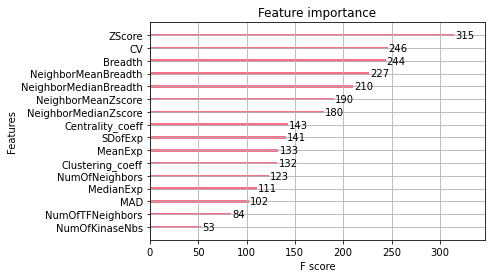

In [36]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [37]:
feature_lists = [['MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff',
       'IsKinase', 'IsTF', 'NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore'],
                 ['MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD'],
                 ['Centrality_coeff', 'Clustering_coeff',
        'NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore'],['ZScore'],['MedianExp'],['SDofExp'],['Breadth']]

labels = ['All','All expression features',
          'All network features','ZScore','MedianExp','Std Dev','Breadth']

(58449, 16) (14613, 16)
(58449, 7) (14613, 7)
(58449, 7) (14613, 7)
(58449, 1) (14613, 1)
(58449, 1) (14613, 1)
(58449, 1) (14613, 1)
(58449, 1) (14613, 1)


<Figure size 864x720 with 0 Axes>

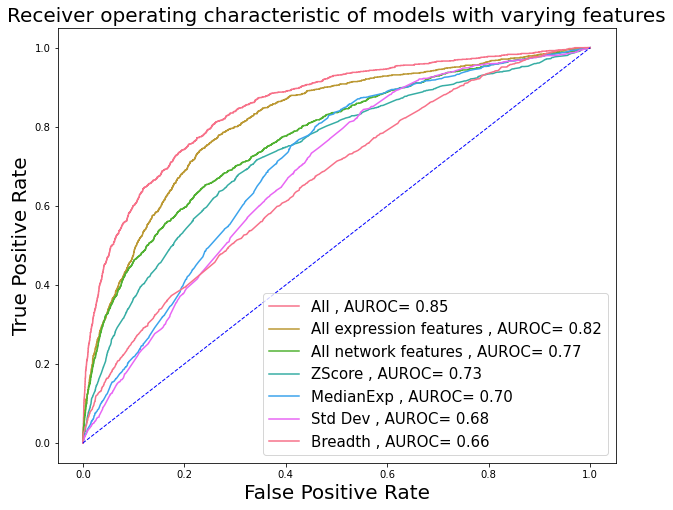

In [40]:
plt.figure(figsize=(12,10))
ax = plt.figure(figsize=(10,8))

# plt.figure(0).clf()
label_count = 0
for feature_l in feature_lists:
    X = train_df[feature_l]
    y = train_df['Label'].tolist()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    print(X_train.shape,X_test.shape)

    model = XGBClassifier(max_depth=5, n_estimators=100,
                          learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)

    y_prob_dict = {0:[],1:[]}

    for i in y_scores:
        y_prob_dict[0].append(i[0])
        y_prob_dict[1].append(i[1])

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_dict[1])
    auc_score = roc_auc_score(y_test, y_prob_dict[1])
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_dict[1], pos_label=1)
    plt.plot(fpr,tpr,label= str(labels[label_count])+" , AUROC= {0:0.2f}".format(auc_score))
#     plt.plot(fpr,tpr,label = )
    label_count+=1
    
    
plt.plot([0, 1], [0, 1], color='b', lw=1, linestyle='--')
plt.legend(loc='lower right',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic of models with varying features',fontsize=20)
plt.rc('axes', titlesize=12) 


# Using LOOV technique to predict each G-T probability

Tissue LOOV

In [78]:
gt_param_df.head(1)

,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Clustering_coeff,...,NumOfTFNeighbors,Centrality_coeff,NeighborMeanBreadth,NeighborMeanZscore,NeighborMedianBreadth,NeighborMedianZscore,Description,Level_enc,Pos,Label
0,ENSG00000187634,Stomach,4.720096,4.267317,-0.036851,3.423,0.763231,0.904074,2.489289,0.047619,...,2,0.000001,0.29606,-0.366241,0.261838,-0.380078,SAMD11,-1.0,0.0,U


In [80]:
gt_param_df.columns

Index(['Gene', 'Tissue', 'MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Clustering_coeff', 'IsKinase', 'IsTF',
       'NeighborList', 'NumOfKinaseNbs', 'NumOfNeighbors', 'NumOfTFNeighbors',
       'Centrality_coeff', 'NeighborMeanBreadth', 'NeighborMeanZscore',
       'NeighborMedianBreadth', 'NeighborMedianZscore', 'Description',
       'Level_enc', 'Pos', 'Label'],
      dtype='object')

In [41]:
gene_list = []
tissue_list = []
label_list = []
probability_list = []

tissues= gt_param_df['Tissue'].drop_duplicates().tolist()
count = 0
for tissue in tissues:
    count+=1
    test_tissue = tissue
    train_df = gt_param_df[gt_param_df['Label'] != 'U']
    train_df = train_df[(train_df['Tissue']!= test_tissue)]
    labels = []

    for index,row in train_df.iterrows():
        if row['Label'] == 'P':
            labels.append(1)
        else:
            labels.append(0)


    train_df['Label'] = labels
    test_df  =  gt_param_df[(gt_param_df['Tissue']== test_tissue)]

    X_train = train_df.drop(['Gene', 'Tissue','Level_enc', 'Pos', 'Label',
                             'Description','NeighborList',
                             'NeighborMedianBreadth', 'NeighborMedianZscore'],axis=1)
    y_train = train_df['Label'].tolist()

    X_test = test_df.drop(['Gene', 'Tissue','Level_enc', 
                           'Pos', 'Label','Description',
                           'NeighborList','NeighborMedianBreadth', 'NeighborMedianZscore'],axis=1)
    y_test = test_df['Label'].tolist()
    
    
    model = XGBClassifier(max_depth=5, n_estimators=100,
                      learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic')
    model.fit(X_train, y_train)
    
    tl = test_df['Tissue'].tolist()
    gl = test_df['Gene'].tolist()
    labl = test_df['Label'].tolist()

    y_scores = model.predict_proba(X_test)
    pl = []
    for i in y_scores:
        pl.append(i[1])
        
    
    gene_list+= gl
    tissue_list+= tl
    label_list+= labl
    probability_list+=pl
    if count%10 == 0:
        print(count)

10
20
30


In [42]:
print(len(gene_list))
print(len(tissue_list))
print(len(label_list))
print(len(probability_list))


453455
453455
453455
453455


In [43]:
tissue_loov_df = pd.DataFrame({'Gene': gene_list, 'Tissue': tissue_list,'Label': label_list,
                               'Probability': probability_list})

tissue_loov_df = tissue_loov_df[['Gene','Tissue','Label','Probability']]
tissue_loov_df['pct_rank'] = tissue_loov_df.groupby('Tissue')['Probability'].rank(ascending = True, pct = True)
tissue_loov_df["Description"] = tissue_loov_df["Gene"].map(gene_lookup_dict_ensg2name)

tissue_loov_df.to_csv('./data_generated/tissue_loov_prob.csv',index = False)
print(tissue_loov_df.shape)
tissue_loov_df.head()

(453455, 6)


,Gene,Tissue,Label,Probability,pct_rank,Description
0,ENSG00000187634,Stomach,U,0.519816,0.441200,SAMD11
1,ENSG00000188976,Stomach,N,0.538279,0.455074,NOC2L
2,ENSG00000187961,Stomach,U,0.695232,0.586020,KLHL17
3,ENSG00000187583,Stomach,U,0.161186,0.148058,PLEKHN1
4,ENSG00000187642,Stomach,N,0.265273,0.244913,PERM1


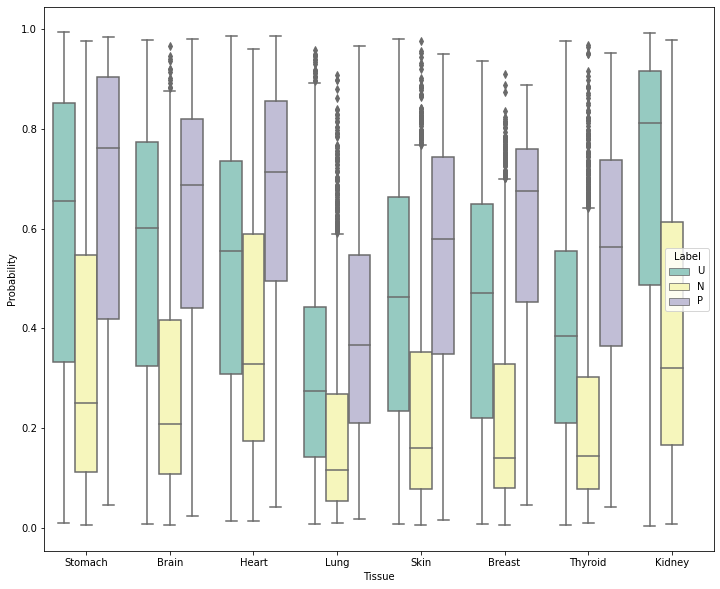

In [44]:
plt.figure(figsize=(12,10))

ax = sns.boxplot(x="Tissue", y="Probability", hue="Label",
             data=tissue_loov_df[tissue_loov_df['Tissue'].
                                 isin(['Brain','Heart','Lung','Skin',
                                       'Kidney','Stomach','Breast','Thyroid'])], palette="Set3")

In [3]:
tissue_loov_df = pd.read_csv('./data_generated/tissue_loov_prob.csv')


In [4]:
len(set(tissue_loov_df[tissue_loov_df['Label']=='P']['Tissue'].tolist()))

25

In [5]:
pos_tissues = set(tissue_loov_df[tissue_loov_df['Label']=='P']['Tissue'].tolist())
tissue_list = []
pval_list = []
num_pos_genes = []
mean_pos_rank = []

for tissue in pos_tissues:
    tissue_list.append(tissue)
    pos_ranks = tissue_loov_df[(tissue_loov_df['Tissue']==tissue)
                               & (tissue_loov_df['Label']=='P')]['pct_rank'].tolist()
    num_pos_genes.append(len(pos_ranks))
    mean_pos_rank.append(np.mean(pos_ranks))
    
    rest_ranks = tissue_loov_df[(tissue_loov_df['Tissue']==tissue)
                               & (tissue_loov_df['Label']!='P')]['pct_rank'].tolist()
    pval =scipy.stats.mannwhitneyu(pos_ranks, rest_ranks, alternative='greater')[1]
    pval_list.append(pval)
    print(tissue)

Spleen
Liver
Testis
Ovary
Vagina
Pancreas
Adrenal Gland
Prostate
Uterus
Brain
Blood Vessel
Colon
Muscle
Skin
Lung
Stomach
Nerve
Thyroid
Small Intestine
Esophagus
Blood
Adipose Tissue
Breast
Heart
Pituitary


In [46]:
tissue_pval_df = pd.DataFrame({'Tissue': tissue_list,
                           'numof_pos_genes': num_pos_genes,
                           'pval': pval_list,
                           'mean_pct_rank':mean_pos_rank})
# tissue_pval_df.to_csv('/fs/cbcb-scratch/gowthami/GTF/GTF_Project_v2/data/supplementary_tables/tissue_pos_pval_df.csv',index = False)

tissue_pval_df['tissue_numb'] = tissue_pval_df['mean_pct_rank'].rank(ascending = False)

tissue_pval_df = tissue_pval_df.sort_values(by=['pval'], ascending=True)

tissue_pval_df

,Tissue,numof_pos_genes,pval,mean_pct_rank,tissue_numb
18,Muscle,929,2.343857e-51,0.637885,11.0
0,Brain,1572,3.658902e-50,0.602504,21.0
7,Liver,368,8.554952e-50,0.719847,1.0
17,Heart,477,2.719942e-44,0.681005,8.0
24,Skin,660,2.954760e-31,0.627136,17.0
23,Lung,479,4.485926e-26,0.636278,12.0
4,Blood,646,2.170374e-20,0.602005,22.0
2,Breast,109,5.436899e-15,0.712975,3.0
14,Thyroid,82,9.237950e-12,0.713613,2.0
13,Testis,245,2.645854e-10,0.613667,20.0


/cmlscratch/gowthami/Anaconda3/envs/nlp/lib/python3.7/site-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/cmlscratch/gowthami/Anaconda3/envs/nlp/lib/python3.7/site-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


Text(0.5, 1.0, 'Mean of predicted ranks of positive genes vs Baseline in 25 tissues')

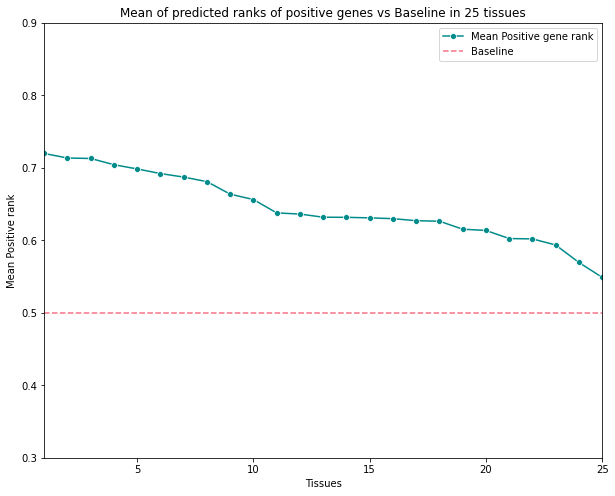

In [47]:
ax = plt.figure(figsize=(10,8))

ax = sns.lineplot(x="tissue_numb", y="mean_pct_rank", data=tissue_pval_df,marker='o',
                  c = 'darkcyan',label = 'Mean Positive gene rank')
ax.set(ylim = (0.3, 0.9))
ax.set(xlim = (1,25 ))
ax.axhline(y=0.5,label ='Baseline',linestyle='dashed')

labels = ["some name", "baseline"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[2:], labels = labels)

plt.xlabel('Tissues')
plt.ylabel('Mean Positive rank')
plt.title('Mean of predicted ranks of positive genes vs Baseline in 25 tissues')

In [7]:
rel_tissues = (set(tissue_loov_df[tissue_loov_df['Label'] == 'N']
                   ['Tissue'].tolist()) ) & (set(tissue_loov_df[tissue_loov_df['Label'] == 'P']
                                                 ['Tissue'].tolist()) )
print(len(rel_tissues))
rel_tissues

20


{'Adrenal Gland',
 'Brain',
 'Breast',
 'Colon',
 'Esophagus',
 'Heart',
 'Liver',
 'Lung',
 'Muscle',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Skin',
 'Small Intestine',
 'Stomach',
 'Testis',
 'Thyroid',
 'Uterus',
 'Vagina'}

In [49]:
pvals = []
for tissue in rel_tissues:
    pos_ranks = tissue_loov_df[(tissue_loov_df['Tissue']==tissue)
                               & (tissue_loov_df['Label']=='P')]['pct_rank'].tolist()
    
    neg_ranks = tissue_loov_df[(tissue_loov_df['Tissue']==tissue)
                               & (tissue_loov_df['Label']=='N')]['pct_rank'].tolist()
    pval =scipy.stats.mannwhitneyu(pos_ranks, neg_ranks, alternative='greater')[1]
    pvals.append(pval)
    print(tissue,pval)

Brain 7.519417704886153e-241
Breast 6.752815199278233e-38
Adrenal Gland 6.090263178153579e-14
Prostate 4.938733230367151e-05
Small Intestine 9.28838020953501e-09
Liver 1.4663850657983804e-82
Ovary 1.1091604316167307e-11
Vagina 0.0006713331332942793
Esophagus 5.954682676758267e-32
Colon 1.3417361536808298e-26
Pancreas 2.8234171999147893e-21
Testis 3.776902338317131e-49
Thyroid 7.061523527898223e-28
Heart 1.055706670011063e-93
Muscle 3.962690227256785e-139
Pituitary 0.6505700598856567
Uterus 1.539265701617102e-16
Stomach 1.7955614646874592e-26
Lung 6.3314656842059256e-83
Skin 5.085506874003173e-134


In [8]:
tmp = tissue_loov_df[tissue_loov_df['Label']!= 'U']
tmp = tmp[tmp['Tissue'].isin(rel_tissues)]

In [25]:
rank_df = tmp.groupby(['Tissue', 'Label']).mean().reset_index()
rank_df = rank_df[['Tissue', 'Label','pct_rank']]
rank_df = rank_df.pivot(index='Tissue', columns='Label', values=['pct_rank']).reset_index()
rank_df

Tissue  pct_rank          
Label                          N         P
0        Adrenal Gland  0.339547  0.656283
1                Brain  0.254149  0.602504
2               Breast  0.296773  0.712975
3                Colon  0.259000  0.626413
4            Esophagus  0.337516  0.631775
5                Heart  0.374029  0.681005
6                Liver  0.384245  0.719847
7                 Lung  0.338771  0.636278
8               Muscle  0.353027  0.637885
9                Ovary  0.406357  0.704377
10            Pancreas  0.319212  0.687279
11           Pituitary  0.749530  0.663723
12            Prostate  0.334542  0.698529
13                Skin  0.294180  0.627136
14     Small Intestine  0.317569  0.548939
15             Stomach  0.304895  0.615415
16              Testis  0.307387  0.613667
17             Thyroid  0.310086  0.713613
18              Uterus  0.307434  0.629928
19              Vagina  0.370932  0.569480

In [26]:
rank_df.columns

MultiIndex([(  'Tissue',  ''),
            ('pct_rank', 'N'),
            ('pct_rank', 'P')],
           names=[None, 'Label'])

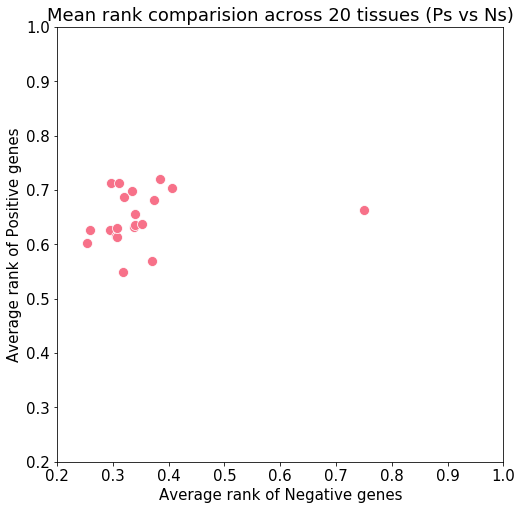

In [39]:
ax = plt.figure(figsize=(8,8))

ax = sns.scatterplot(data=rank_df, x=('pct_rank', 'N'), y=('pct_rank', 'P'),s=100)
plt.xlabel('Average rank of Negative genes',fontsize = 15)
plt.ylabel('Average rank of Positive genes',fontsize = 15)
plt.title('Mean rank comparision across 20 tissues (Ps vs Ns)',fontsize=18)
plt.ylim(0.2,1)
plt.xlim(0.2,1)

ax.tick_params(labelsize=15)

plt.show()

WilcoxonResult(statistic=209.0, pvalue=5.167324782326882e-05)


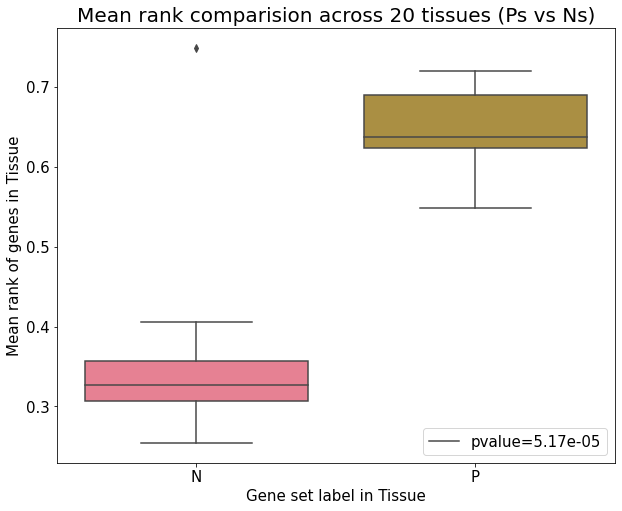

In [52]:
p = rank_df[rank_df['Label'] =='P']['pct_rank'].tolist()
n = rank_df[rank_df['Label'] =='N']['pct_rank'].tolist()
print(scipy.stats.wilcoxon(p,n, alternative = 'greater'))
ax = plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Label", y="pct_rank", data=rank_df)
ax.legend(labels = ['pvalue=5.17e-05'], loc = 'lower right',fontsize = 15)
plt.xlabel('Gene set label in Tissue',fontsize = 15)
plt.ylabel('Mean rank of genes in Tissue',fontsize = 15)
plt.title('Mean rank comparision across 20 tissues (Ps vs Ns)',fontsize = 20)
ax.tick_params(labelsize=15)



### Gene LOOV

In [ ]:
gt_param_df_pn = gt_param_df[gt_param_df['Label'] != 'U']
labels = []
for index,row in gt_param_df_pn.iterrows():
    if row['Label'] == 'P':
        labels.append(1)
    else:
        labels.append(0)
gt_param_df_pn['Label'] = labels        
        
print(datetime.datetime.now())
gene_list = []
tissue_list = []
label_list = []
probability_list = []

genes = gt_param_df['Gene'].drop_duplicates().tolist()
print('len of genes: '+ str(len(genes)))
count = 0
for gl in zip(*[iter(genes)]*50):
    count+=1
    test_genes = list(gl)
#     print(len(test_genes))
#     print(test_genes)
    
    train_df = gt_param_df_pn[~(gt_param_df_pn['Gene'].isin(test_genes))]
    
    test_df  =  gt_param_df[(gt_param_df['Gene'].isin(test_genes))]
#     print(test_df.shape)

    X_train = train_df.drop(['Gene', 'Tissue','Level_enc', 'Pos', 'Label',
                             'Description','NeighborList',
                             'NeighborMedianBreadth', 'NeighborMedianZscore'],axis=1)

    y_train = train_df['Label'].tolist()

    X_test = test_df.drop(['Gene', 'Tissue','Level_enc', 'Pos', 'Label',
                             'Description','NeighborList',
                             'NeighborMedianBreadth', 'NeighborMedianZscore'],axis=1)
    y_test = test_df['Label'].tolist()
    
    
    model = XGBClassifier(max_depth=5, n_estimators=100,
                      learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic',nthread = 8)
    model.fit(X_train, y_train)
    
    tl = test_df['Tissue'].tolist()
    gl = test_df['Gene'].tolist()
    labl = test_df['Label'].tolist()

    y_scores = model.predict_proba(X_test)
    pl = []
    for i in y_scores:
        pl.append(i[1])
        
    
    gene_list+= gl
    tissue_list+= tl
    label_list+= labl
    probability_list+=pl
    
    if count%20 == 0:
        print(datetime.datetime.now())
        print(count)

/cmlscratch/gowthami/Anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2020-06-12 17:35:58.494691
len of genes: 16387
2020-06-12 17:37:46.138204
20
2020-06-12 17:39:33.722495
40
2020-06-12 17:41:21.213129
60
2020-06-12 17:43:08.930099
80
2020-06-12 17:44:56.891484
100
2020-06-12 17:46:44.509774
120
2020-06-12 17:48:32.084219
140
2020-06-12 17:50:19.422674
160
2020-06-12 17:52:07.005173
180
2020-06-12 17:53:54.947431
200
2020-06-12 17:55:42.664982
220
2020-06-12 17:57:30.366560
240
2020-06-12 17:59:18.207242
260
2020-06-12 18:01:06.214591
280
2020-06-12 18:02:53.935049
300


In [54]:
print(len(gene_list))
print(len(tissue_list))
print(len(label_list))
print(len(probability_list))



452907
452907
452907
452907


In [55]:
gene_loov_df = pd.DataFrame({'Gene': gene_list, 'Tissue': tissue_list,
                             'Label': label_list,'Probability': probability_list})
gene_loov_df = gene_loov_df[['Gene','Tissue','Label','Probability']]

gene_loov_df["Description"] = gene_loov_df["Gene"].map(gene_lookup_dict_ensg2name)
gene_loov_df['pct_rank'] = gene_loov_df.groupby('Tissue')['Probability'].rank(ascending = True, pct = True)

gene_loov_df.to_csv('./data_generated/gene_loov_prob.csv',index = False)
gene_loov_df.head()

,Gene,Tissue,Label,Probability,Description,pct_rank
0,ENSG00000187634,Stomach,U,0.472404,SAMD11,0.405186
1,ENSG00000188976,Stomach,N,0.602642,NOC2L,0.507838
2,ENSG00000187961,Stomach,U,0.567949,KLHL17,0.477479
3,ENSG00000187583,Stomach,U,0.265154,PLEKHN1,0.253257
4,ENSG00000187642,Stomach,N,0.246935,PERM1,0.236391


In [2]:
gene_loov_df = pd.read_csv('./data_generated/gene_loov_prob.csv')


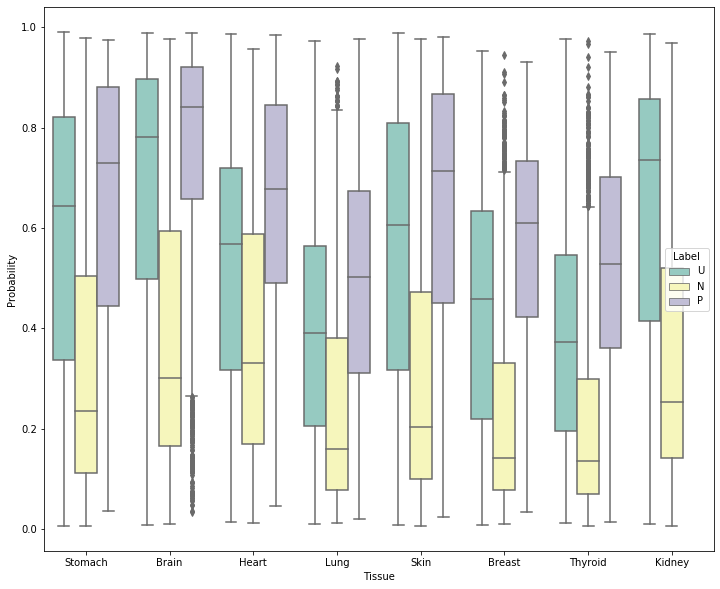

In [3]:
plt.figure(figsize=(12,10))

ax = sns.boxplot(x="Tissue", y="Probability", hue="Label",
             data=gene_loov_df[gene_loov_df['Tissue'].
                                 isin(['Brain','Heart','Lung','Skin',
                                       'Kidney','Stomach','Breast','Thyroid'])], palette="Set3")

In [4]:
rel_genes = (set(gene_loov_df[gene_loov_df['Label'] == 'N']
                   ['Gene'].tolist()) ) & (set(gene_loov_df[gene_loov_df['Label'] == 'P']
                                                 ['Gene'].tolist()) )
print(len(rel_genes))

gene_loov_df.head()

1197


,Gene,Tissue,Label,Probability,Description,pct_rank
0,ENSG00000187634,Stomach,U,0.472404,SAMD11,0.405186
1,ENSG00000188976,Stomach,N,0.602642,NOC2L,0.507838
2,ENSG00000187961,Stomach,U,0.567949,KLHL17,0.477479
3,ENSG00000187583,Stomach,U,0.265154,PLEKHN1,0.253257
4,ENSG00000187642,Stomach,N,0.246935,PERM1,0.236391


In [5]:
tmp = gene_loov_df[gene_loov_df['Label']!= 'U']
tmp = tmp[tmp['Gene'].isin(rel_genes)]
rank_df = tmp.groupby(['Gene', 'Label']).mean().reset_index()
rank_df.head(10)

,Gene,Label,Probability,pct_rank
0,ENSG00000000971,N,0.425133,0.515187
1,ENSG00000000971,P,0.864915,0.551713
2,ENSG00000001084,N,0.697935,0.882956
3,ENSG00000001084,P,0.873011,0.689945
4,ENSG00000001626,N,0.110131,0.148438
5,ENSG00000001626,P,0.366572,0.447945
6,ENSG00000001631,N,0.620328,0.742467
7,ENSG00000001631,P,0.990044,0.994415
8,ENSG00000003393,N,0.300960,0.443555
9,ENSG00000003393,P,0.737531,0.669767


In [8]:
rank_df = rank_df.pivot(index='Gene', columns='Label', values=['pct_rank']).reset_index()
rank_df.head()

Gene  pct_rank          
Label                          N         P
0      ENSG00000000971  0.515187  0.551713
1      ENSG00000001084  0.882956  0.689945
2      ENSG00000001626  0.148438  0.447945
3      ENSG00000001631  0.742467  0.994415
4      ENSG00000003393  0.443555  0.669767

In [13]:
rank_df.shape

(1197, 3)

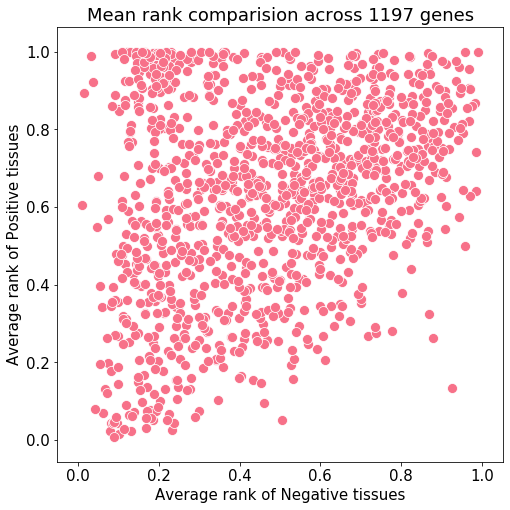

In [14]:
ax = plt.figure(figsize=(8,8))

ax = sns.scatterplot(data=rank_df, x=('pct_rank', 'N'), y=('pct_rank', 'P'),s=100)
plt.xlabel('Average rank of Negative tissues',fontsize = 15)
plt.ylabel('Average rank of Positive tissues',fontsize = 15)
plt.title('Mean rank comparision across 1197 genes',fontsize=18)
# plt.ylim(0.2,1)
# plt.xlim(0.2,1)

ax.tick_params(labelsize=15)

plt.show()

WilcoxonResult(statistic=157915.0, pvalue=4.189496530456141e-63)


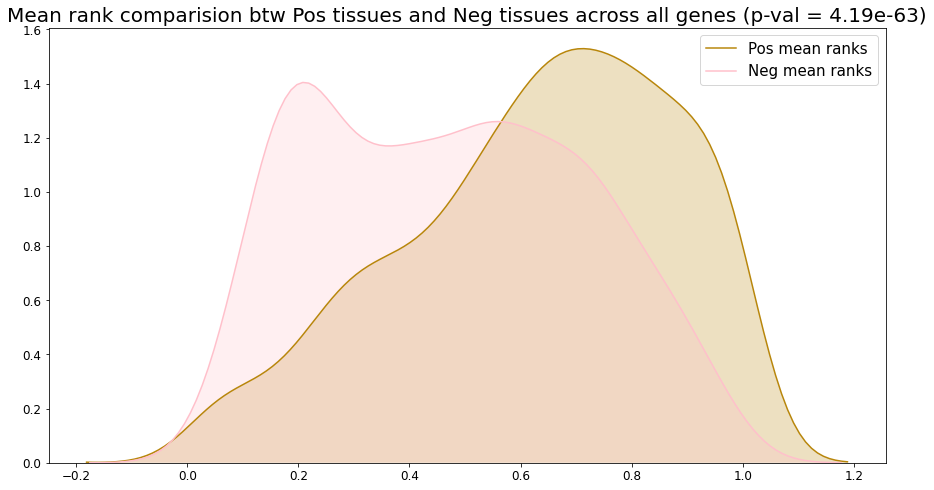

In [60]:
p = rank_df[rank_df['Label'] =='P']['pct_rank'].tolist()
n = rank_df[rank_df['Label'] =='N']['pct_rank'].tolist()
print(scipy.stats.wilcoxon(p,n))
ax = plt.figure(figsize=(15,8))
ax = sns.kdeplot( p , color="darkgoldenrod", label="Pos mean ranks", shade = True)
ax = sns.kdeplot( n , color="pink", label="Neg mean ranks", shade = True)
plt.legend(loc="upper right",fontsize = 15 )

# plt.xlabel('Gene set label in Tissue')
# plt.ylabel('Mean rank of genes in Tissue')
plt.title('Mean rank comparision btw Pos tissues and Neg tissues across all genes (p-val = 4.19e-63)',fontsize = 20)
ax.tick_params(labelsize=12)

WilcoxonResult(statistic=23594.0, pvalue=1.7971100304551353e-172)


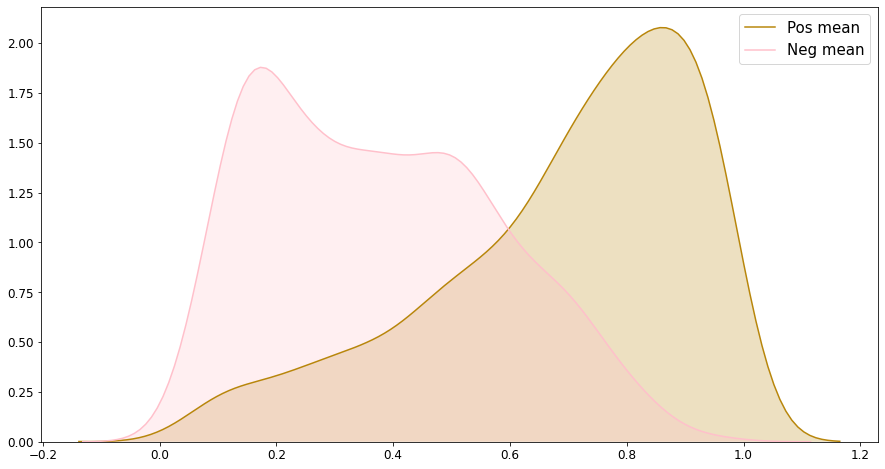

In [61]:
p = rank_df[rank_df['Label'] =='P']['Probability'].tolist()
n = rank_df[rank_df['Label'] =='N']['Probability'].tolist()
print(scipy.stats.wilcoxon(p,n))
ax = plt.figure(figsize=(15,8))
ax = sns.kdeplot( p , color="darkgoldenrod", label="Pos mean", shade = True)
ax = sns.kdeplot( n , color="pink", label="Neg mean", shade = True)
plt.legend(loc="upper right",fontsize = 15 )

# plt.xlabel('Gene set label in Tissue')
# plt.ylabel('Mean rank of genes in Tissue')
# plt.title('Mean prob comparision btw Pos tissues and Neg tissues across all genes (p-val = 6.69e-66)',fontsize = 20)
ax.tick_params(labelsize=12)